# Step 1 : Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df=pd.read_csv(r"E:\Git_repo\titanic.csv")
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#check data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
#Check number of passengers which were present in the titanic
print("Number of passengers which were present in the ship :")
len(titanic_df.index)

Number of passengers which were present in the ship :


891

# Step 2 : Analyzing Data

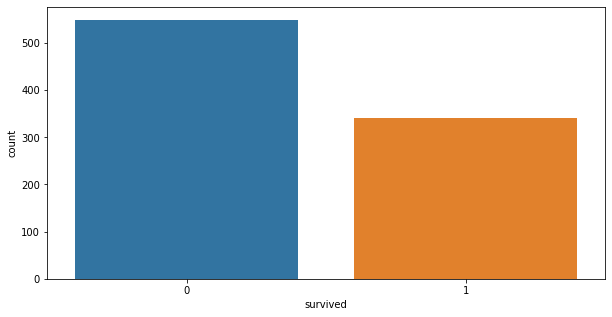

In [5]:
#how may survived & how many did not survived |          0 = did not survived, 1 = survived
plt.figure(figsize=(10,5))
sns.countplot(x="survived",data=titanic_df)

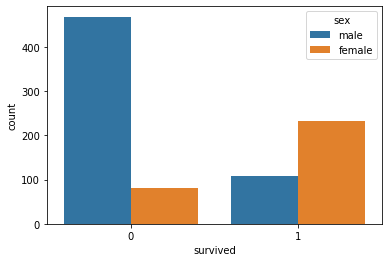

In [6]:
#the passengers which survived & dead. How many were man & how many were female
sns.countplot(x="survived",hue="sex",data=titanic_df)

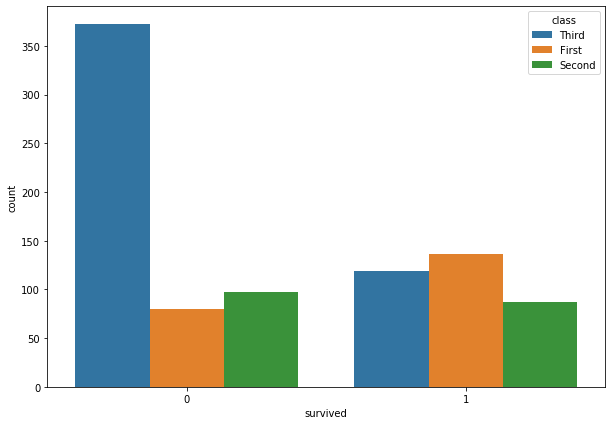

In [7]:
#Now we will see which type of passenger class survived the most did it was passengers of class First, Second & Third
plt.figure(figsize=(10,7))
sns.countplot(x="survived",hue="class",data=titanic_df)

#### In the above graph we can see that people who were in 3rd class died more than 2nd & 1st class

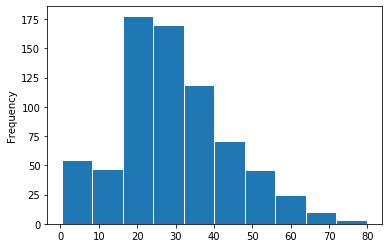

In [8]:
#Now we will see the age of the passengers which were presend on the ship
titanic_df["age"].plot.hist(rwidth=0.97)

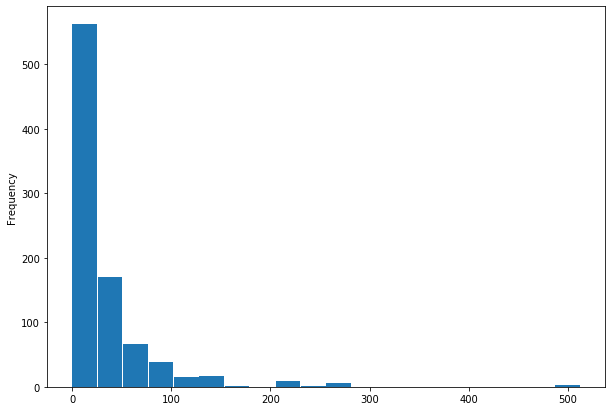

In [9]:
#let us plot graph of the fare
plt.figure(figsize=(10,7))
titanic_df["fare"].plot.hist(rwidth=0.97,bins=20)

# Step 3 : Data Wrangling (Cleaning data by removing unwanted NaN values)

In [10]:
#check how many NaN values are present in the Dataset
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

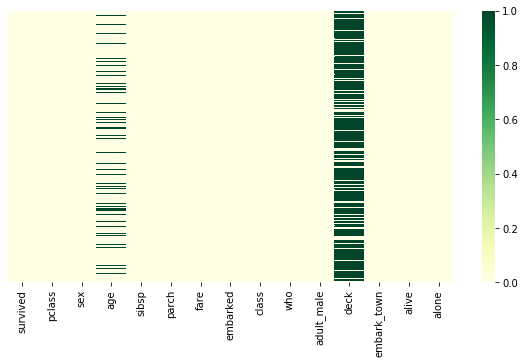

In [11]:
#lets draw a heap map for better understanding
plt.figure(figsize=(10,5))
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap="YlGn")

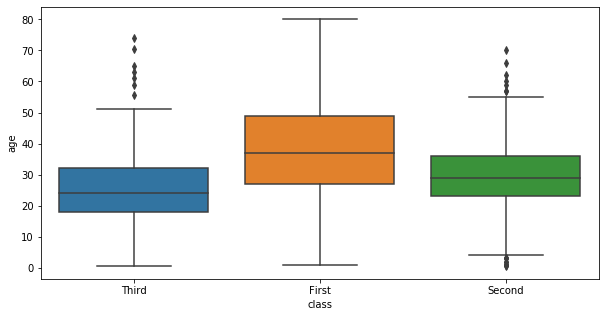

In [12]:
#Now lets take age column & fix the NaN values in that
plt.figure(figsize=(10,5))
sns.boxplot(x="class",y="age",data=titanic_df)

In [13]:
#Now for logistic regression lets analyze the dataset
titanic_df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


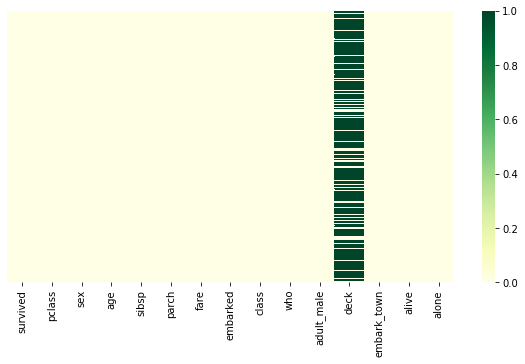

In [14]:
#To get accurate data lets take mean of the columns & put them in to missing values eg : "age"
plt.figure(figsize=(10,5))
titanic_df.age=titanic_df.age.fillna(titanic_df.age.mean())
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap="YlGn")

##### As you can see that we had filled NaN in age with mean values
##### Now the deck column is not usefull for us in any way to predict the survival rate. So we can drop it

In [15]:
# Droping the deck column
titanic_df=titanic_df.drop("deck",axis=1)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


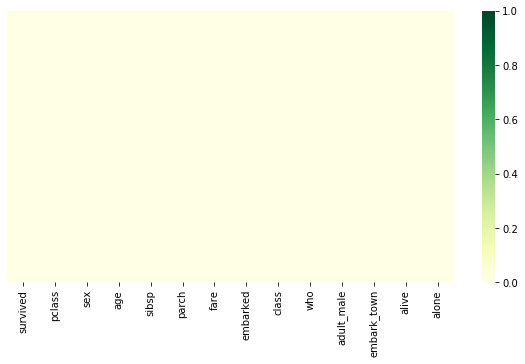

In [16]:
#Now we can see our dataframe is clean to predict the survival & implement the logistic regression
plt.figure(figsize=(10,5))
titanic_df.age=titanic_df.age.fillna(titanic_df.age.mean())
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap="YlGn")

In [17]:
# checking the presence of NaN value in Data
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [18]:
titanic_df.dropna(inplace=True)

In [19]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

##### Now our data is clean but there is one problem 
##### To implement logistic regression we have to convert string into categorical data

In [20]:
# Now we will use pandas to do that


##### Now above table means in female column : 0 = not female i.e male & 1 = female

In [21]:
titanic_df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [22]:
d_sex=pd.get_dummies(titanic_df['sex'],drop_first=True)
d_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [23]:
#Now we can drop any of these column from C, Q, S
# so we will get S=[1,0], Q=[0,1] & C=[0,0]
d_emb=pd.get_dummies(titanic_df['embarked'],drop_first=True)
d_emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
d_class=pd.get_dummies(titanic_df['class'],drop_first=True)
d_class

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [25]:
titanic_df=pd.concat([titanic_df,d_sex,d_emb,d_class],axis=1)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S,Second,Third
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1,0,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,0,1,1,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1,0,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1,0,1
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,0,0,0,0


In [26]:
#Now we have 3 useless columns
titanic_df=titanic_df.drop(['sex','class','embarked','pclass','fare','who','embark_town','alone','alive','adult_male'],axis=1)
titanic_df

,survived,age,sibsp,parch,male,Q,S,Second,Third
0,0,22.000000,1,0,1,0,1,0,1
1,1,38.000000,1,0,0,0,0,0,0
2,1,26.000000,0,0,0,0,1,0,1
3,1,35.000000,1,0,0,0,1,0,0
4,0,35.000000,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,1,0,1,1,0
887,1,19.000000,0,0,0,0,1,0,0
888,0,29.699118,1,2,0,0,1,0,1
889,1,26.000000,0,0,1,0,0,0,0


# Step 4 : Train & Test Data

In [27]:
X=titanic_df.drop("survived",axis=1)
y=titanic_df["survived"]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.790436005625879

In [30]:
pred=model.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
val=classification_report(y_test,pred)
val

'              precision    recall  f1-score   support\n\n           0       0.87      0.89      0.88       123\n           1       0.73      0.69      0.71        55\n\n    accuracy                           0.83       178\n   macro avg       0.80      0.79      0.79       178\nweighted avg       0.82      0.83      0.82       178\n'

In [32]:
y_test.value_counts()

0    123
1     55
Name: survived, dtype: int64

In [33]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[109  14]
 [ 17  38]]


In [34]:
print(metrics.recall_score(y_test,pred))

0.6909090909090909


# Step 5 : Check the Accuracy 

In [35]:
from sklearn.metrics import accuracy_score
val2=accuracy_score(y_test,pred)
val2

0.8258426966292135